<a href="https://colab.research.google.com/github/nikx-bot/SCT_DS_4/blob/main/traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

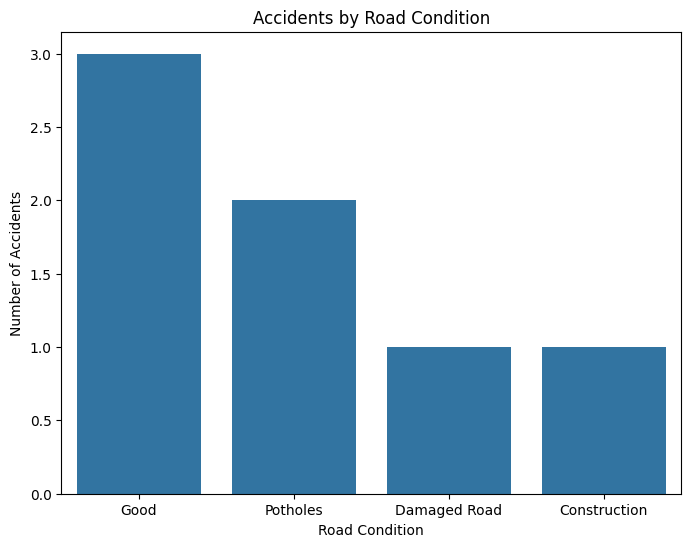

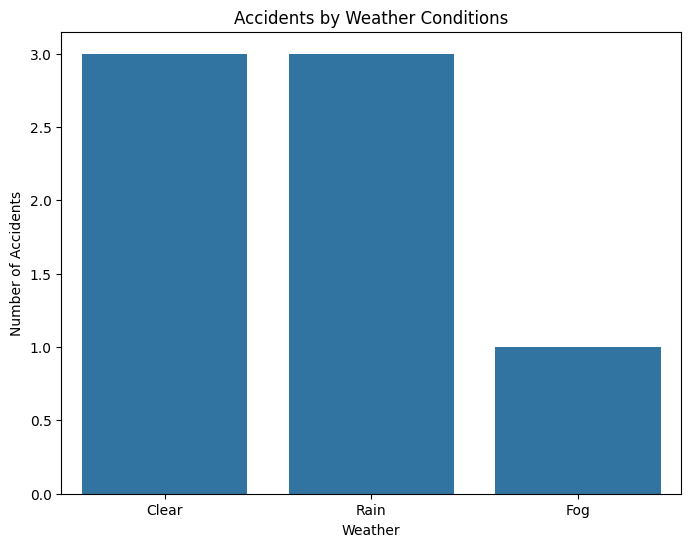

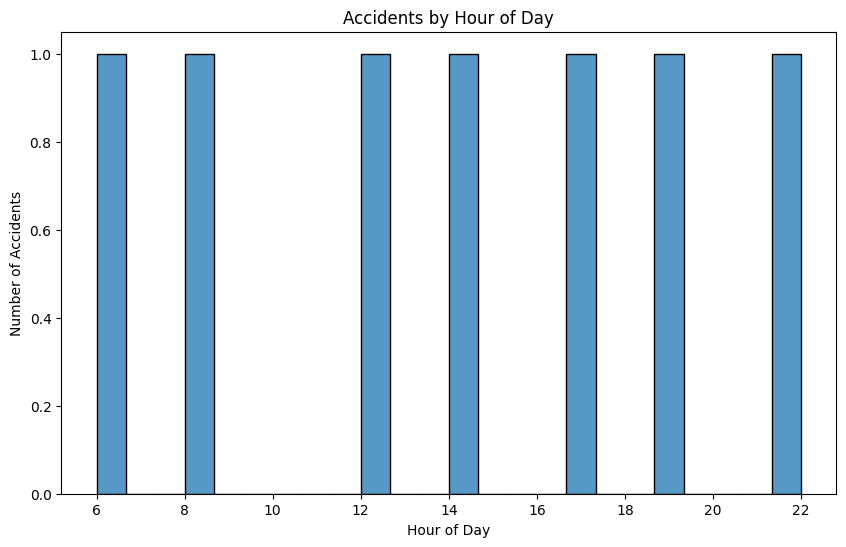

Analysis complete. Check the generated plots and open 'accident_hotspots.html' to view hotspots.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Create a sample dataset inline
data = pd.DataFrame({
    'latitude': [40.7128, 40.7138, 40.7148, 40.7158, 40.7168, 40.7178, 40.7188],
    'longitude': [-74.0060, -74.0050, -74.0040, -74.0030, -74.0020, -74.0010, -74.0000],
    'road_condition': ['Good', 'Potholes', 'Damaged Road', 'Good', 'Construction', 'Good', 'Potholes'],
    'weather': ['Clear', 'Rain', 'Fog', 'Clear', 'Rain', 'Clear', 'Rain'],
    'hour_of_day': [8, 17, 22, 12, 6, 14, 19],
    'contributing_factor': ['Speeding', 'Distraction', 'DUI', 'Reckless Driving', 'Speeding', 'Distraction', 'DUI']
})

# Analyze accidents by road condition
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='road_condition')
plt.title('Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.show()

# Analyze accidents by weather
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='weather')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Number of Accidents')
plt.show()

# Analyze accidents by hour of day
plt.figure(figsize=(10, 6))
sns.histplot(data['hour_of_day'], bins=24, kde=False)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Visualize accident hotspots on a map
avg_lat = data['latitude'].mean()
avg_lon = data['longitude'].mean()

m = folium.Map(location=[avg_lat, avg_lon], zoom_start=14)

# Prepare heatmap data points
heat_data = [[row['latitude'], row['longitude']] for index, row in data.iterrows()]

# Add heatmap layer
HeatMap(heat_data).add_to(m)

# Display the map inline (if in Jupyter Notebook) or save to an HTML file
# For Jupyter, uncomment the next line:
# display(m)
# Else, save the map to an HTML file
m.save('accident_hotspots.html')
print("Analysis complete. Check the generated plots and open 'accident_hotspots.html' to view hotspots.")